<a href="https://colab.research.google.com/github/francianerod/MBA-USP-Esalq/blob/main/Regress%C3%A3o_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Código feito por:** Franciane Rodrigues

**Disciplina:** Regressão Simples e Múltipla 1

**Professor:** Prof. Dr. Luiz Paulo Fávero.

**Aula ministrada em:** 27 de julho de 2021

**Curso:** MBA em Data Science e Analytics

**Instituição:** Pecege - USP/Esalq

**Referência:** FÁVERO, L. P. L.; BELFIORE, P. P. Manual de análise de dados: estatística e modelagem multivariada com Excel, SPSS e Stata. Rio de Janeiro: Elsevier, 2021.


# **REGRESSÃO LINEAR SIMPLES**

Professor resolveu esses problemas usando o Solver do Excel e códigos em Linguagem R,

## **1. Usando o Google Colab e instalando pacotes**

In [ ]:
# Comando de abertura para Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install plotly

## **2. Regresão Linear Simples - Modo teórico**

Vamos calcular uma regressão linear simples como se não houvesse nenhum tipo de software capaz de nos ajudar nessta tarefa. Você também conseguirá reproduzir em lápis e papel, claro com uma base pequena, seguindo os passos deste código.

Em uma regressão linear simples estamos interessados em desenvolver uma equação linear que apresente a relação entre uma variável dependente (y) e uma variável explicativa (x), sem que, necessariamente, ocorra uma relação de causa e efeito.

Conforme Fávero e Belfiore (2021), o modelo de regressão linear simples pode ser estimado a partir da seguinte expressão abaixo:

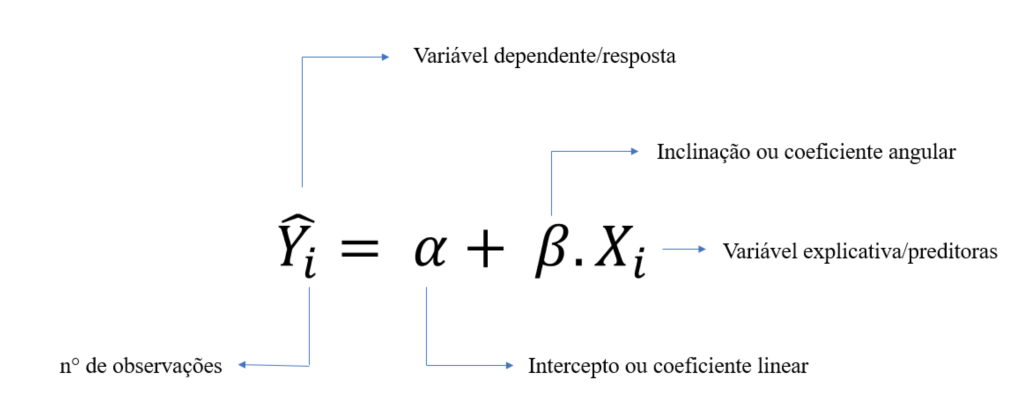

**Exemplo 1:** Introduziremos os conceitos de regressão por meio de um exemplo que considera apenas uma variável explicativa (regressão linear simples). Imagine que, em determinado dia de aula um professor tenha o interesse em
saber, para uma turma de 1O estudantes de uma mesma classe, qual a relação entre a distância percorrida para se chegar à escola e o tempo de percurso. Sendo assim, o professor elaborou um questionamento com cada um dos seus 10 alunos e montou um banco de dados que se encontra abaixo:

In [ ]:
# Abertura de bibliotecas
import pandas as pd

# Abertura e organização dos dados
dataset1 = pd.read_csv('/content/drive/MyDrive/MBA USP Esalq/Regressão Simples e Múltipla I/Dados1.txt', sep='\t')

# Mostrando o dataset (ou banco de dados)
dataset1

,Tempo (Y),Distância (X)
0,15,8
1,20,6
2,20,15
3,40,20
4,50,25
5,25,11
6,10,5
7,55,32
8,35,28
9,30,20


In [ ]:
# Passo 1: Calcule média das colunas Tempo (Y) e Distância (x)
media_tempo = dataset1['Tempo (Y)'].mean()
media_dist  = dataset1['Distância (X)'].mean()

# Imprima na tela os resultados
print('A média do tempo (Y) é: ', media_tempo)
print('A media da distância (X) é: ', media_dist)

A média do tempo (Y) é:  30.0
A media da distância (X) é:  17.0


In [ ]:
#Passo 2: Subtraia os valores observados de tempo e distância e a sua respectiva média
dataset1['Xi-Xmedia'] = dataset1['Distância (X)'] - media_dist
dataset1['Yi-Ymedia'] = dataset1['Tempo (Y)'] - media_tempo

#Passo 3: Multiplique (Xi-Xmedia) x (Yi-Ymedia)
dataset1['(Xi-Xmedia).(Yi-Ymedia)'] = dataset1['Xi-Xmedia'] * dataset1['Yi-Ymedia']

#Passo 4: Faça (Xi-Xmedia)²
dataset1['(Xi-Xmedia)²'] = dataset1['Xi-Xmedia'] ** 2

# Aparecendo as duas primeiras posições do Dataset (ou banco de dados) para ver se o cálculo foi correto
dataset1.head(2)

,Tempo (Y),Distância (X),Xi-Xmedia,Yi-Ymedia,(Xi-Xmedia).(Yi-Ymedia),(Xi-Xmedia)²
0,15,8,-9.0,-15.0,135.0,81.0
1,20,6,-11.0,-10.0,110.0,121.0


In [ ]:
# Passo 5: Some os valores das colunas (Xi-Xmedia).(Yi-Ymedia) e (Xi-Xmedia)²
somatorio_numerador   = dataset1['(Xi-Xmedia).(Yi-Ymedia)'].sum()
somatorio_denominador = dataset1['(Xi-Xmedia)²'].sum()

# Imprima na tela os resultados
print('Somatório de (Xi-Xmedia).(Yi-Ymedia): ', somatorio_numerador)
print('Somatório de (Xi-Xmedia)²: ', somatorio_denominador)

Somatório de (Xi-Xmedia).(Yi-Ymedia):  1155.0
Somatório de (Xi-Xmedia)²:  814.0


Para calcular os estimadores/coeficientes alfa e beta, vamos usar as expressoões de acordo com Fávero e Belfiore (2021) e os valores calculados no dataset1. Vale ressaltar que as equações abaixo seguem 2 critérios:

*   **Soma dos erros igual a zero:** Com apenas esta primeira condição, podem ser encontradas diversas retas de regressão em que a somatória
dos erros (resíduos) seja zero. Portanto, faz-se necessário o estabelecimento de uma segunda condição.

*   **Soma dos erros ao quadrado sendo a mínima possível:** essa condição vai escolher a melhor reta que se ajusta à nuvem de pontos. Logo estamos determinando alfa e beta de modo que a somatória dos quadrados dos erros (resíduos) seja a menor possível. Assim chamado de método de Mínimos Quadrados Ordinários - MQO, ou, em inglês, Ordinary Least Squares - OLS.

**A grande pergunta é:** Quais valores de alfa e beta que minimizam a soma dos erros², garantindo que a soma dos erros seja zero? Eis as equações abaixo que garantem essas condições.

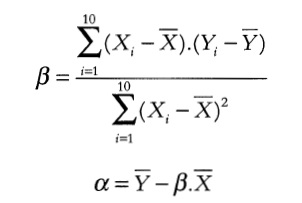

In [ ]:
# Passo 6: Com os resultados encontrados, vamos calcular os valores de alfa e beta
beta = somatorio_numerador/somatorio_denominador
alfa = media_tempo - beta * media_dist

# Imprima valores na tela
print('Valor do intercepto (coeficiente linear/alfa) da reta é: ', round(alfa,4))
print('Valor da inclinação (coeficiente angular/beta) da reta é: ', round(beta,4))

Valor do intercepto (coeficiente linear/alfa) da reta é:  5.8784
Valor da inclinação (coeficiente angular/beta) da reta é:  1.4189


In [ ]:
# Passo 7: Mas os critérios estão satisfeitos? Vamos preparar a base de dados para isso

# 1.Vamos abrir o dataset1 inicial
dataset1 = pd.read_csv('/content/drive/MyDrive/MBA USP Esalq/Regressão Simples e Múltipla I/Dados1.txt', sep='\t')

# 2. Calcule o valor esperado de tempo para cada observação considerando o que foi encontrado na equação y = alfa + beta.X
dataset1['tempo_esp'] = 5.8784 + 1.4189 * dataset1['Distância (X)']

# 3. Calcule o erro Y (Observado) - Y(esperado)
dataset1['erro'] = dataset1['Tempo (Y)'] - dataset1['tempo_esp']

# 4. Calcule o erro²
dataset1['erro²'] = dataset1['erro']**2

# Soma dos erros e erro²
soma_erro = dataset1['erro'].sum()
soma_erro_quad = dataset1['erro²'].sum()

#Apresentar os resultados: Vale ressaltar que são os mesmos valores que aparecem na Linguagem R e Excel
display(dataset1)
print('')
print('Somatório dos erros é: ', round(soma_erro, 2))
print('Somatório dos erros² é: ', round(soma_erro_quad, 2))

,Tempo (Y),Distância (X),tempo_esp,erro,erro²
0,15,8,17.2296,-2.2296,4.971116
1,20,6,14.3918,5.6082,31.451907
2,20,15,27.1619,-7.1619,51.292812
3,40,20,34.2564,5.7436,32.988941
4,50,25,41.3509,8.6491,74.806931
5,25,11,21.4863,3.5137,12.346088
6,10,5,12.9729,-2.9729,8.838134
7,55,32,51.2832,3.7168,13.814602
8,35,28,45.6076,-10.6076,112.521178
9,30,20,34.2564,-4.2564,18.116941



Somatório dos erros é:  0.0
Somatório dos erros² é:  361.15


# **3. Regresão Linear Simples - Modo gráfico**

In [ ]:
# Calculando MQO e plotando o gráfico via Plotly

#Importado as bibliotecas
import plotly.express as px
import pandas as pd

# Abertura e organização dos dados
dataset1 = pd.read_csv('/content/drive/MyDrive/MBA USP Esalq/Regressão Simples e Múltipla I/Dados1.txt', sep='\t')

# Figura e cálculo
fig = px.scatter(dataset1,
                x='Distância (X)',
                y='Tempo (Y)',
                opacity=0.65,
                trendline='ols',
                trendline_color_override='darkblue',
                title="Regressão Linear Simples"
                )

# Tamanho e mostrar gráfico
fig.update_layout(width=800, height=500)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
